In [1]:
import os
import sys
print(os.path.abspath(''))

pkg_path = os.path.abspath('..')
print(pkg_path)
sys.path.insert(0, pkg_path)

import pandas
corrected_data = pandas.read_csv('../data/log_normal_fitted.csv')

/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin/notebooks
/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin


In [2]:
corrected_data

,filename,date,strain,plasmid,backbone,iptg_concentration,lowfsc,lowgfp,real_time,log_mean_gfp,log_mean_v,log_std_gfp,log_std_v,log_rho,fit_goodness,std_gfp_correct
0,Huseyin2019-09-24.0001.fcs,2019-09-24,KT 2440,1201,pSeva221,0,6.425437,0.608937,2019-09-24 15:55:05,0.250036,2.314908,0.474749,0.963332,0.299708,0.975201,0.452925
1,Huseyin2019-09-24.0002.fcs,2019-09-24,KT 2440,1201,pSeva221,5,6.015331,0.539061,2019-09-24 15:56:06,0.037474,1.950081,0.456776,0.945077,0.328764,0.989436,0.431385
2,Huseyin2019-09-24.0003.fcs,2019-09-24,KT 2440,1201,pSeva221,10,6.055118,0.552027,2019-09-24 15:57:07,0.093799,2.196333,0.463687,0.949740,0.289366,0.982129,0.443850
3,Huseyin2019-09-24.0004.fcs,2019-09-24,KT 2440,1201,pSeva221,20,7.181627,0.531118,2019-09-24 15:58:08,0.173098,2.280760,0.494051,0.984647,0.353470,0.981735,0.462158
4,Huseyin2019-09-24.0005.fcs,2019-09-24,KT 2440,1201,pSeva221,30,6.007504,0.523445,2019-09-24 15:59:09,0.044898,2.189524,0.461442,0.961913,0.282821,0.979128,0.442603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Huseyin2019-09-26.0281.fcs,2019-09-26,DH5α,SrpR-S4,pSeva221,200,4.757235,0.414770,2019-09-26 15:48:57,-0.194275,2.421361,0.465537,1.088471,0.171667,0.983499,0.458626
849,Huseyin2019-09-26.0282.fcs,2019-09-26,DH5α,SrpR-S4,pSeva221,500,5.140736,0.430098,2019-09-26 15:49:59,-0.123461,2.671281,0.490201,1.087739,0.196164,0.978036,0.480677
850,Huseyin2019-09-26.0283.fcs,2019-09-26,DH5α,SrpR-S4,pSeva221,1000,5.105510,0.435157,2019-09-26 15:51:01,-0.105915,2.627236,0.493216,1.106167,0.191733,0.979958,0.484066
851,Huseyin2019-09-26.0284.fcs,2019-09-26,DH5α,SrpR-S4,pSeva221,2000,4.655399,0.431738,2019-09-26 15:52:03,-0.109492,2.818970,0.488869,1.133579,0.219406,0.973108,0.476957


In [3]:
def get_all_plasmid(plasmid_id, df):
    return df[(df.plasmid == plasmid_id)]
    
def get_mean_gfps(plasmid_id, strain_id, backbone_id, df):
    data = df[(df.plasmid == plasmid_id) & (df.backbone == backbone_id) & (df.strain == strain_id)]
    return [point for point in zip(data.iptg_concentration, data.log_mean_gfp)]

def get_plasmids(df):
    return df.plasmid.drop_duplicates()[df.plasmid != 'Empty']

def get_strains(df):
    return df.strain.drop_duplicates()[df.strain != 'Empty']

def get_backbones(df):
    return df.backbone.drop_duplicates()[df.backbone != 'Empty']

get_plasmids(corrected_data)
get_strains(corrected_data)
get_backbones(corrected_data)

0      pSeva221
288         pAN
Name: backbone, dtype: object

In [4]:
from pyolin.gate import Gate
from pyolin.utils import shape_agreement

parts = {}

for plasmid in get_plasmids(corrected_data):
    gates = []
    for strain in get_strains(corrected_data):
        for backbone in get_backbones(corrected_data):
            characterisation = get_mean_gfps(plasmid, strain, backbone, corrected_data)
            if characterisation:
                xs = [x[0] for x in characterisation]
                ys = [y[1] for y in characterisation]
                gates.append(Gate(f"{strain}_{backbone}_{plasmid}", xs, ys))
            
    parts[plasmid] = gates

In [5]:
from pyolin.utils import similarity

import similaritymeasures as sm

for part in parts:
    gates = parts[part]
    for a in gates:
        for b in gates:
            score = similarity(a, b)
            print(f"{a.name} vs. {b.name} = {score}")

KT 2440_pSeva221_1201 vs. KT 2440_pSeva221_1201 = 0.0
KT 2440_pSeva221_1201 vs. DH5α_pSeva221_1201 = 5.201436880911128
KT 2440_pSeva221_1201 vs. DH5α_pAN_1201 = 1.26362639529342
DH5α_pSeva221_1201 vs. KT 2440_pSeva221_1201 = 19.454647605054213
DH5α_pSeva221_1201 vs. DH5α_pSeva221_1201 = 0.0
DH5α_pSeva221_1201 vs. DH5α_pAN_1201 = 14.88831069112351
DH5α_pAN_1201 vs. KT 2440_pSeva221_1201 = 3.806629839121572
DH5α_pAN_1201 vs. DH5α_pSeva221_1201 = 13.173178070232247
DH5α_pAN_1201 vs. DH5α_pAN_1201 = 0.0
KT 2440_pSeva221_1717 vs. KT 2440_pSeva221_1717 = 0.0
KT 2440_pSeva221_1717 vs. DH5α_pSeva221_1717 = 8.839700214880523
KT 2440_pSeva221_1717 vs. DH5α_pAN_1717 = 16.35863358244408
DH5α_pSeva221_1717 vs. KT 2440_pSeva221_1717 = 5.404875464574513
DH5α_pSeva221_1717 vs. DH5α_pSeva221_1717 = 0.0
DH5α_pSeva221_1717 vs. DH5α_pAN_1717 = 3.8248695720095576
DH5α_pAN_1717 vs. KT 2440_pSeva221_1717 = 20.137315423470334
DH5α_pAN_1717 vs. DH5α_pSeva221_1717 = 8.829608091583864
DH5α_pAN_1717 vs. DH5α_pAN_

DH5α_pSeva221_SrpR-S3 vs. DH5α_pAN_SrpR-S3 = 0.4571708401083316
DH5α_pAN_SrpR-S3 vs. KT 2440_pSeva221_SrpR-S3 = 7.506191243771877
DH5α_pAN_SrpR-S3 vs. DH5α_pSeva221_SrpR-S3 = 0.5760463835967656
DH5α_pAN_SrpR-S3 vs. DH5α_pAN_SrpR-S3 = 0.0
KT 2440_pSeva221_SrpR-S4 vs. KT 2440_pSeva221_SrpR-S4 = 0.0
KT 2440_pSeva221_SrpR-S4 vs. DH5α_pSeva221_SrpR-S4 = 7.759648020942008
KT 2440_pSeva221_SrpR-S4 vs. DH5α_pAN_SrpR-S4 = 7.21830710759065
DH5α_pSeva221_SrpR-S4 vs. KT 2440_pSeva221_SrpR-S4 = 5.961304190759471
DH5α_pSeva221_SrpR-S4 vs. DH5α_pSeva221_SrpR-S4 = 0.0
DH5α_pSeva221_SrpR-S4 vs. DH5α_pAN_SrpR-S4 = 0.37312208426686533
DH5α_pAN_SrpR-S4 vs. KT 2440_pSeva221_SrpR-S4 = 9.161727964727083
DH5α_pAN_SrpR-S4 vs. DH5α_pSeva221_SrpR-S4 = 0.5544242576978573
DH5α_pAN_SrpR-S4 vs. DH5α_pAN_SrpR-S4 = 0.0


In [6]:
for part in parts:
    gates = parts[part]
    for a in gates:
        for b in gates:
            shape_score = shape_agreement(a, b)
            translation_score = abs(a.params["ymin"] - b.params["ymin"]) + abs(a.params["ymax"] - b.params["ymax"]) 
            print(f"{a.name} vs. {b.name} = {shape_score + translation_score}")

KT 2440_pSeva221_1201 vs. KT 2440_pSeva221_1201 = 0.0
KT 2440_pSeva221_1201 vs. DH5α_pSeva221_1201 = 0.590626005287583
KT 2440_pSeva221_1201 vs. DH5α_pAN_1201 = 0.29193567454998465
DH5α_pSeva221_1201 vs. KT 2440_pSeva221_1201 = 0.590626005287583
DH5α_pSeva221_1201 vs. DH5α_pSeva221_1201 = 0.0
DH5α_pSeva221_1201 vs. DH5α_pAN_1201 = 0.40722900467680334
DH5α_pAN_1201 vs. KT 2440_pSeva221_1201 = 0.29193567454998465
DH5α_pAN_1201 vs. DH5α_pSeva221_1201 = 0.40722900467680334
DH5α_pAN_1201 vs. DH5α_pAN_1201 = 0.0
KT 2440_pSeva221_1717 vs. KT 2440_pSeva221_1717 = 0.0
KT 2440_pSeva221_1717 vs. DH5α_pSeva221_1717 = 2.2379595555312095
KT 2440_pSeva221_1717 vs. DH5α_pAN_1717 = 3.714406156999346
DH5α_pSeva221_1717 vs. KT 2440_pSeva221_1717 = 2.2379595555312095
DH5α_pSeva221_1717 vs. DH5α_pSeva221_1717 = 0.0
DH5α_pSeva221_1717 vs. DH5α_pAN_1717 = 1.476406557296122
DH5α_pAN_1717 vs. KT 2440_pSeva221_1717 = 3.714406156999346
DH5α_pAN_1717 vs. DH5α_pSeva221_1717 = 1.476406557296122
DH5α_pAN_1717 vs. DH

KT 2440_pSeva221_SrpR-S2 vs. DH5α_pAN_SrpR-S2 = 3.2974337265408495
DH5α_pSeva221_SrpR-S2 vs. KT 2440_pSeva221_SrpR-S2 = 2.5202803527381574
DH5α_pSeva221_SrpR-S2 vs. DH5α_pSeva221_SrpR-S2 = 0.0
DH5α_pSeva221_SrpR-S2 vs. DH5α_pAN_SrpR-S2 = 0.7789360028243942
DH5α_pAN_SrpR-S2 vs. KT 2440_pSeva221_SrpR-S2 = 3.2974337265408495
DH5α_pAN_SrpR-S2 vs. DH5α_pSeva221_SrpR-S2 = 0.7789360028243942
DH5α_pAN_SrpR-S2 vs. DH5α_pAN_SrpR-S2 = 0.0
KT 2440_pSeva221_SrpR-S3 vs. KT 2440_pSeva221_SrpR-S3 = 0.0
KT 2440_pSeva221_SrpR-S3 vs. DH5α_pSeva221_SrpR-S3 = 2.2000814262617534
KT 2440_pSeva221_SrpR-S3 vs. DH5α_pAN_SrpR-S3 = 2.781952126327559
DH5α_pSeva221_SrpR-S3 vs. KT 2440_pSeva221_SrpR-S3 = 2.2000814262617534
DH5α_pSeva221_SrpR-S3 vs. DH5α_pSeva221_SrpR-S3 = 0.0
DH5α_pSeva221_SrpR-S3 vs. DH5α_pAN_SrpR-S3 = 0.5815908566156667
DH5α_pAN_SrpR-S3 vs. KT 2440_pSeva221_SrpR-S3 = 2.781952126327559
DH5α_pAN_SrpR-S3 vs. DH5α_pSeva221_SrpR-S3 = 0.5815908566156667
DH5α_pAN_SrpR-S3 vs. DH5α_pAN_SrpR-S3 = 0.0
KT 244

In [7]:
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import FCPlate
from FlowCytometryTools import PolyGate

sample = FCMeasurement(ID='Test', datafile='../data/FCS/Huseyin2019-10-04.0114.fcs')

/home/campus.ncl.ac.uk/b8051106/src/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [8]:
sample.get_data()

,FSC-A,FSC-H,SSC-A,SSC-H,GFP-A,GFP-H,PI-A,PI-H,HDR-CE,HDR-SE,...,VioGreen-A,VioGreen-H,PE-A,PE-H,mCherry-A,mCherry-H,mKate_APC-A,mKate_APC-H,PE-Vio770-A,PE-Vio770-H
0,-18.915733,5.086519,-17.897402,18.354622,-47.247524,26.366159,-3.782643,2.021597,0.00001,0.00001,...,-151.349319,-0.010347,0.063834,0.575249,0.014475,0.792451,6.875987,9.122348,0.363860,0.492259
1,22.600527,16.056049,44.937195,35.438278,67.994820,43.388741,3.543687,3.193680,0.00002,0.00002,...,87.659500,102.833572,-0.039167,0.579194,0.082916,0.727261,12.530607,22.509016,0.180058,0.418415
2,16.463257,13.172616,26.368261,22.791609,40.243427,31.860891,0.708058,1.980229,0.00003,0.00003,...,-6.489363,45.413933,0.102878,0.556739,-0.224797,0.487215,-0.516018,9.316463,0.201067,0.485917
3,-8.518334,7.970260,-4.934125,24.365772,50.685551,63.666077,2.434498,4.841063,0.00004,0.00004,...,-5.279198,88.839584,-0.032229,0.449802,-0.293429,0.534746,2.643462,9.375030,0.285324,0.663572
4,-9.178418,11.564987,8.100206,29.640793,-26.027155,18.584721,-1.636150,0.974317,0.00005,0.00005,...,-119.062096,10.931023,-0.012698,0.589460,-0.258119,0.455375,-1.479754,6.568865,0.207669,0.396126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80961,1.643386,3.064155,-8.042627,5.424642,11.729899,18.667315,0.590834,1.088968,0.80962,0.80962,...,-45.054317,8.481627,-0.130633,0.468992,-0.182777,0.635135,5.458910,9.711290,0.353352,0.531002
80962,2.745951,5.216350,-11.021418,8.515954,-12.248327,13.831316,-0.692765,1.115584,0.80963,0.80963,...,7.589222,43.736111,0.478908,0.469780,-0.167645,0.501156,6.788047,6.161425,0.231768,0.451994
80963,6.677187,3.757646,9.606856,13.610456,16.057806,18.473143,0.502768,1.404891,0.80964,0.80964,...,89.770187,63.297489,0.265700,0.635607,-0.064221,0.512327,9.223539,13.660789,0.339305,0.429983
80964,8.658757,8.147527,11.299891,7.772781,20.100569,24.301126,0.989467,1.930177,0.80965,0.80965,...,64.756714,39.407375,0.066524,0.596189,0.102824,0.224285,9.576865,13.500475,0.234880,0.524110


/home/campus.ncl.ac.uk/b8051106/src/anaconda3/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)
/home/campus.ncl.ac.uk/b8051106/.local/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


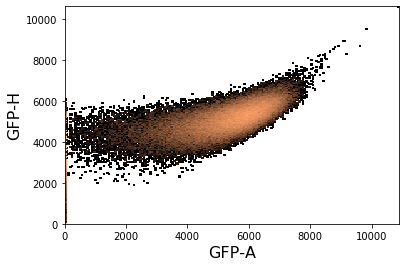

In [9]:
sample.transform('tlog', channels=['GFP-A', 'GFP-H']).plot(['GFP-A', 'GFP-H']);